# AI Project To Recognizing ASL Hand Signs Using Deep Learning

##### by Sahand Raoufiirani, December, 11, 2018

Professor Chuck Anderson

## Introduction

American Sign Language (ASL) is a natural language that the deaf community in
the United States and most of Anglophone Canada use to communicate. Since sign
language is commonly known only to those who are deaf, as well as their immediate
friends and their families, it can sometimes be hard to communicate for people that use
ASL. Improvement of technology, and machine learning community makes it possible to
translate sign languages to another language or vice versa. Our goal is process images
from the ASL alphabet to the English alphabet. This project is important because it can
help those who do not understand sign language communicate with those who use it.
Also, improving this project can solve the problems of translating different languages to
each other from an image or video file. Recognizing ASL is also interesting because it
can translate itself well to gesture recognition problems. Applications of recognizing ASL
can include VR text entry, real-time ASL interpretation, or the reverse (English language
to ASL).

For the beginning of the project, we need to have data with sample images for
ASL signs, which each sign displays a particular character. Data can be small image
files that are taken with a camera or drawn by hand. Next step will be converting these
files to computer readable format, that means making data frames with pixels of the
image files. Having the data ready to use makes it possible to start our job and try to
use some methods to classify each new image of ASL sign, with an English alphabet. In
order to do that first we need to train our program with the sample data, which if we
don’t have large enough data, our program won't be able to learn better and could be
cause classifying the image signs with the wrong values. After
training the program with training data, we need to test it with the new data, to see how
well the program could classify the images to English characters. I've divided the data
into training and testing data, so I can train it using training part and test it with
another part, and calculate the error rate. The error rate must be acceptable, and if it is
not low enough, I need to find other ways and methods to solve the problem or try
different input numbers for the machine learning methods. At the end, I will display the
error rate and show the results to decide how usable is this program
in real life.

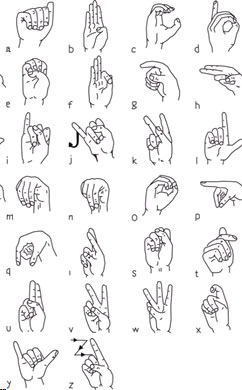

In [58]:
from IPython.display import Image
Image("2.jpg")

## Data

I am using a dataset which is composed of 29 different file sets, with eighty seven thousand total images. Each subset contains three thousand images of an ASL character. The symbols are 'A' through 'Z', not case sensitive, as well as space, delete, and
nothing but I haven't consider space, delete. and nothing. The dataset is 1GB total. The data did not require any cleaning and there are no missing values. To use this data in the program we need to associate each subset with a letter or numerical representation of each character. There are limitations to this data due to the large number of files. This results in extremely long processing times.
This dataset can be found on kaggle: https://www.kaggle.com/grassknoted/asl-alphabet .

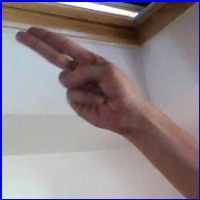

In [59]:
Image("1.jpg")

## Methods

Since it's very large data(3000 images per each english characters) and training the network using this data requires large amount of memory and time, I have two options; First option will be using a percent of data instead of the whole data, and second option is using Big Data methods such as spark. I decided to use the first option, and used first 60 images per letter. If I get low level of precision for different hidden layer structures I'd use more images per letter. I devided the data to train and test data. Train data will have 40 images per letter and test data will be 10 images per letter.

The algorithm that I've used is from the lecture notes in the class (neuralnetworks.py), and other packages including CV2, numpy, and matplotlib.

In [2]:
import cv2
import numpy as np

Using CV2 package it's possible to read each image file pixel by pixel and get the rgb value for each pixel and store it in a numpy array. Each pixel has 3 values, red, green, and blue. Each image file is 200 * 200 whcih means it has 40,000 pixels and 120,000 values, which we can stor them in a three dimentional matrice of shape (200, 200, 3).

We can start from reading one image to see how it looks like:

In [2]:
img = cv2.imread("asl_alphabet_train/A/A1.jpg")

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(200, 200, 3)

In [5]:
img

array([[[252,   2,   1],
        [248,   0,   1],
        [249,   0,  10],
        ...,
        [248,   0,   4],
        [252,   4,   3],
        [246,   0,   0]],

       [[249,   1,   1],
        [234,   1,   3],
        [209,   6,  15],
        ...,
        [198,   6,  17],
        [210,   2,   4],
        [227,  11,   6]],

       [[241,   0,   0],
        [206,   8,  10],
        [144,  32,  39],
        ...,
        [244, 173, 189],
        [255, 165, 174],
        [164,   7,  11]],

       ...,

       [[254,   3,   5],
        [195,   3,   3],
        [213, 135, 129],
        ...,
        [158, 129, 144],
        [224, 125, 135],
        [144,   9,  17]],

       [[251,   0,   0],
        [219,   8,   4],
        [255, 124, 120],
        ...,
        [225, 126, 136],
        [253, 114, 118],
        [172,  13,  15]],

       [[251,   1,   0],
        [227,   6,   2],
        [173,  10,   7],
        ...,
        [146,  11,  19],
        [172,  13,  17],
        [179,   7,   7]]

We can access to each pixel of the image by using index of it

In [6]:
img[100,100,:]

array([10,  9, 18], dtype=uint8)

I'd like to have all information of the image in a 2D array instead of three dimentional, so each image will be in the shape of (200, 600)

In [7]:
img_new = img.reshape(200,600)

In [8]:
img_new.shape

(200, 600)

In [9]:
img_new

array([[252,   2,   1, ..., 246,   0,   0],
       [249,   1,   1, ..., 227,  11,   6],
       [241,   0,   0, ..., 164,   7,  11],
       ...,
       [254,   3,   5, ..., 144,   9,  17],
       [251,   0,   0, ..., 172,  13,  15],
       [251,   1,   0, ..., 179,   7,   7]], dtype=uint8)

But this is still hard to calculate when we have all the images stored in the same numpy array. So we can store all the information an image in a line. This way we know each line of the numpy array includes all the rgb values of all the pixels of one image. So the new shape of one image file will be (1, 120000). This means one row and 120000 columns.

In [10]:
img_new2 = img.reshape(1,-1)

In [11]:
img_new2.shape

(1, 120000)

In [12]:
img_new2

array([[252,   2,   1, ..., 179,   7,   7]], dtype=uint8)

One of the problems is we have large number of columns for each image in this means more memory usage and more calculation time. One of the solutions to sove this problem is using gray scale of the images. So instead of storing three values for each pixel, we can have only one value, and this helps to use less memory and less time for calculation. So each image will be in the shape of (200, 200), and will be black and white instead of colored.

In [13]:
A = cv2.imread("asl_alphabet_train/A/A1.jpg", cv2.IMREAD_GRAYSCALE)
A

array([[ 30,  28,  31, ...,  28,  32,  26],
       [ 29,  28,  32, ...,  31,  26,  34],
       [ 27,  31,  47, ..., 186, 182,  26],
       ...,
       [ 32,  25, 142, ..., 137, 139,  27],
       [ 28,  31, 138, ..., 140, 131,  32],
       [ 28,  30,  28, ...,  29,  32,  27]], dtype=uint8)

In [14]:
A.shape

(200, 200)

And again we can store all the information of each image in a line so the final shape for each image will be (1, 40000)

In [15]:
A = A.reshape(1,-1)

In [16]:
A.shape

(1, 40000)

In [17]:
A

array([[30, 28, 31, ..., 29, 32, 27]], dtype=uint8)

The modified data is stored in a folder called asl_alphabet_train and each char is stored in a seprated folder. this way we can collect the data in our datset and, since we need target value to classify each image, we can store the folder name as target value to another numpy array. In here target value will be name of the folder which is the English letter that the image is reffering to. Also we can devide the data to train and test data.

In [7]:
folder = "asl_alphabet_train/"
subs = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [33]:
xTrain = np.ndarray(shape=(0,40000))
tTrain = np.array([])
xTest = np.ndarray(shape=(0,40000))
tTest = np.array([])
#data = data.reshape(1,40000)
for i in subs:
    for j in range(1,41):
        tTrain = np.append(arr=tTrain,values=i)
        temp = cv2.imread((folder+i+'/'+i+str(j)+'.jpg'), cv2.IMREAD_GRAYSCALE)
        #print(type(temp))
        temp = np.array(temp.reshape(1,-1))
        #print(temp.shape)
        #data= np.vstack(temp)
        xTrain = np.concatenate((temp,xTrain))
        
    for j in range(41,51):
        tTest = np.append(arr=tTest,values=i)
        temp = cv2.imread((folder+i+'/'+i+str(j)+'.jpg'), cv2.IMREAD_GRAYSCALE)
        #print(type(temp))
        temp = np.array(temp.reshape(1,-1))
        #print(temp.shape)
        #data= np.vstack(temp)
        xTest = np.concatenate((temp,xTest))
        

Now we have four datasets: train data, target for train data, test data, and target for test data

In [34]:
xTrain.shape, tTrain.shape, xTest.shape, tTest.shape

((1040, 40000), (1040,), (260, 40000), (260,))

In [45]:
tTest

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G',
       'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'J',
       'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'K', 'K', 'K', 'K',
       'K', 'K', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q',
       'Q', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S

In [46]:
tTrain

array(['A', 'A', 'A', ..., 'Z', 'Z', 'Z'], dtype='<U32')

Since the shape of target values for train and test data is one dementional we can reshape it to 2 dimentional array to have the same dimentional arrays for all of the data.

In [35]:
tTrain=tTrain.reshape(1040,1)
tTest=tTest.reshape(260,1)

In [36]:
xTrain.shape, tTrain.shape, xTest.shape, tTest.shape

((1040, 40000), (1040, 1), (260, 40000), (260, 1))

In [50]:
xTrain

array([[27., 31., 26., ..., 28., 28., 30.],
       [26., 31., 29., ..., 30., 26., 30.],
       [28., 31., 27., ..., 30., 28., 30.],
       ...,
       [30., 29., 27., ..., 31., 29., 29.],
       [30., 27., 31., ..., 29., 30., 28.],
       [30., 28., 31., ..., 29., 32., 27.]])

Now we can import the neuralnetworks class provided in AI lectures and use non-leanirer regression to train the network to classify new images for each English character. To do non-leanirer regression I've used different hidden layer structures with different number of iterations to find the best hidden layer structure with this data, that gives us the lowest error rate.

In [6]:
import neuralnetworks as nn
import mlutils as ml

First I start with hidden layer structure of [5,10] and training it with 100 iteration to check the results

In [63]:
nnet = nn.NeuralNetworkClassifier(xTrain.shape[1], [5,10], 26)

In [53]:
nnet.train(xTrain, tTrain, 100, verbose=True)

SCG: Iteration 10 ObjectiveF=0.07816 Scale=7.812e-09 Time=0.17636 s/iter
SCG: Iteration 20 ObjectiveF=0.06780 Scale=7.629e-12 Time=0.18494 s/iter
SCG: Iteration 30 ObjectiveF=0.06447 Scale=7.451e-15 Time=0.18695 s/iter
SCG: Iteration 40 ObjectiveF=0.06151 Scale=1.000e-15 Time=0.17419 s/iter
SCG: Iteration 50 ObjectiveF=0.06007 Scale=1.000e-15 Time=0.18196 s/iter
SCG: Iteration 60 ObjectiveF=0.05900 Scale=1.000e-15 Time=0.17661 s/iter
SCG: Iteration 70 ObjectiveF=0.05801 Scale=1.000e-15 Time=0.19012 s/iter
SCG: Iteration 80 ObjectiveF=0.05701 Scale=1.000e-15 Time=0.18801 s/iter
SCG: Iteration 90 ObjectiveF=0.05619 Scale=1.000e-15 Time=0.17694 s/iter
SCG: Iteration 100 ObjectiveF=0.05581 Scale=1.000e-15 Time=0.17453 s/iter


NeuralNetwork(40000, [5, 10], 26)
   Network was trained for 100 iterations. Final error is 0.055811702711950094.

Now that the network is trained for given data we can use it to train and test data. Test data is more important because it's all new images tha the network hasn't seen before

In [54]:
Ytest = nnet.use(xTest)

In [55]:
Ytrain = nnet.use(xTrain)

`percentCorrect(A, B)` is a fuction to define the percentage of the correct result vs the given data to check how well the network has been trained to classify each image for the right English character

In [13]:
def percentCorrect(A, B):
    return np.sum(A == B) / len(B) * 100

In [75]:
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(tTest, Ytest)))
#ml.confusionMatrix(tTest, Ytest, subs)


Testing data: Percent Correct  23.46


In [76]:
print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(tTrain, Ytrain)))
#ml.confusionMatrix(tTrain, Ytrain, range(26))


Training data: Percent Correct  57.12


This hidden layer structure with the 100 iterations gives us 23.46 percent correct for the test data wich is low and I can try different hidden layer structures and different number of iterations to find better value. The higher percentage is better. so this time I try [5,5,10,20], wich means it has four hidden layers, 5 units for first couple layers and 10 for the third one and 20 for the last one

In [77]:
nnet = nn.NeuralNetworkClassifier(xTrain.shape[1], [5,5,10,20], 26)
nnet.train(xTrain, tTrain, 100, verbose=True)
Ytest = nnet.use(xTest)
Ytrain = nnet.use(xTrain)
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(tTest, Ytest)))
print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(tTrain, Ytrain)))

SCG: Iteration 10 ObjectiveF=0.09005 Scale=3.906e-09 Time=0.10577 s/iter
SCG: Iteration 20 ObjectiveF=0.08011 Scale=3.815e-12 Time=0.10535 s/iter
SCG: Iteration 30 ObjectiveF=0.07566 Scale=3.725e-15 Time=0.10335 s/iter
SCG: Iteration 40 ObjectiveF=0.07328 Scale=1.000e-15 Time=0.10219 s/iter
SCG: Iteration 50 ObjectiveF=0.07168 Scale=1.000e-15 Time=0.10517 s/iter
SCG: Iteration 60 ObjectiveF=0.06981 Scale=1.000e-15 Time=0.10636 s/iter
SCG: Iteration 70 ObjectiveF=0.06840 Scale=1.000e-15 Time=0.10282 s/iter
SCG: Iteration 80 ObjectiveF=0.06746 Scale=1.000e-15 Time=0.10470 s/iter
SCG: Iteration 90 ObjectiveF=0.06616 Scale=1.000e-15 Time=0.10241 s/iter
SCG: Iteration 100 ObjectiveF=0.06419 Scale=1.000e-15 Time=0.11881 s/iter

Testing data: Percent Correct  28.08

Training data: Percent Correct  41.06


This time the percent was similar to the previuse one so again I can try different ones. Also I want to plot the error trace so I can see if it needs to train longer or not

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

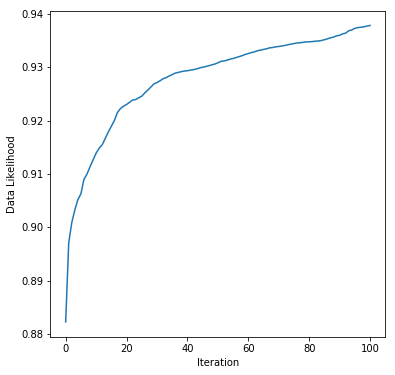

In [80]:
plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

by looking at the plots I can see the network needs to train longer, since the error trace is still getting better. So I train it with five hidden layers and 20 units for each, for 200 iterations

In [81]:
nnet = nn.NeuralNetworkClassifier(xTrain.shape[1], [20,20,20,20,20], 26)
nnet.train(xTrain, tTrain, 200, verbose=True)
Ytest = nnet.use(xTest)
Ytrain = nnet.use(xTrain)
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(tTest, Ytest)))
print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(tTrain, Ytrain)))

SCG: Iteration 20 ObjectiveF=0.02660 Scale=1.526e-11 Time=0.13187 s/iter
SCG: Iteration 40 ObjectiveF=0.00789 Scale=1.000e-15 Time=0.11201 s/iter
SCG: Iteration 60 ObjectiveF=0.00135 Scale=1.000e-15 Time=0.11525 s/iter
SCG: Iteration 80 ObjectiveF=0.00031 Scale=1.000e-15 Time=0.11471 s/iter
SCG: Iteration 100 ObjectiveF=0.00011 Scale=1.000e-15 Time=0.11153 s/iter
SCG: Iteration 120 ObjectiveF=0.00006 Scale=1.000e-15 Time=0.11123 s/iter
SCG: Iteration 140 ObjectiveF=0.00003 Scale=1.000e-15 Time=0.11179 s/iter
SCG: Iteration 160 ObjectiveF=0.00001 Scale=1.000e-15 Time=0.11635 s/iter
SCG: Iteration 180 ObjectiveF=0.00001 Scale=1.000e-15 Time=0.11194 s/iter
SCG: Iteration 200 ObjectiveF=0.00001 Scale=1.000e-15 Time=0.11581 s/iter

Testing data: Percent Correct  69.23

Training data: Percent Correct  100.00


Text(0,0.5,'Data Likelihood')

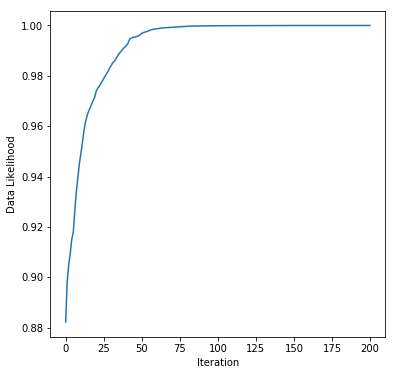

In [82]:
plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')

This  gives us much better result. 100 percent for trained data and 69 percent for test data wich is acceptable. Now that we see using different hidden layer structures results different values, it would be better to have a function to chek differnt structures and find the best one

In [26]:
import time

In [27]:
def trainNNs(Xtrain,Ttrain,Xtest,Ttest, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations):
    result = []
    for hidden in hiddenLayerStructures:
        L = []
        start = time.time()
        L.append(hidden)
        Ltrain = []
        Ltest = []    
        for _ in range(numberRepetitions):
            nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hidden, len(np.unique(Ttrain)))
            nnet.train(Xtrain, Ttrain, numberIterations)
            Ytrain = nnet.use(Xtrain)
            Ytest = nnet.use(Xtest)
            Ltrain.append(percentCorrect(Ytrain,Ttrain))
            Ltest.append(percentCorrect(Ytest,Ttest))

        end = time.time()
        L.append(Ltrain)
        L.append(Ltest)
        L.append(end-start)
        result.append(L)
        
    return result

In [28]:
def summarize(results):
    lis = []
    for res in results:
        l = []
        l.append(res[0])
        l.append(sum(res[1])/len(res[1]))
        l.append(sum(res[2])/len(res[2]))
        l.append(res[3])
        lis.append(l)
    return lis

In [30]:
results = trainNNs(xTrain,tTrain,xTest,tTest, 0.8, [0,5,[5,5],[20,20],[20,20,20,20,20]], 2, 200)

In [31]:
summarize(results)

[[0, 100.0, 89.61538461538461, 64.83158254623413],
 [5, 80.43269230769232, 42.5, 852.2998461723328],
 [[5, 5], 64.27884615384616, 38.46153846153847, 842.5524868965149],
 [[20, 20], 100.0, 80.0, 843.6231701374054],
 [[20, 20, 20, 20, 20], 100.0, 73.26923076923077, 822.9250621795654]]

Since we see hidden layer structure with 2 layers gives us better result I tried [40, 40] (2 layers with 40 units each) and got better results

In [40]:
nnet = nn.NeuralNetworkClassifier(xTrain.shape[1], [40,40], 26)
nnet.train(xTrain, tTrain, 200, verbose=True)
Ytest = nnet.use(xTest)
Ytrain = nnet.use(xTrain)
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(tTest, Ytest)))
print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(tTrain, Ytrain)))

SCG: Iteration 20 ObjectiveF=0.00537 Scale=1.907e-12 Time=0.12079 s/iter
SCG: Iteration 40 ObjectiveF=0.00148 Scale=1.000e-15 Time=0.12500 s/iter
SCG: Iteration 60 ObjectiveF=0.00015 Scale=1.000e-15 Time=0.13221 s/iter
SCG: Iteration 80 ObjectiveF=0.00003 Scale=1.000e-15 Time=0.13195 s/iter
SCG: Iteration 100 ObjectiveF=0.00001 Scale=1.000e-15 Time=0.13275 s/iter
SCG: Iteration 120 ObjectiveF=0.00000 Scale=1.000e-15 Time=0.12130 s/iter
SCG: Iteration 140 ObjectiveF=0.00000 Scale=1.000e-15 Time=0.12238 s/iter
SCG: Iteration 160 ObjectiveF=0.00000 Scale=4.000e-15 Time=0.01250 s/iter
SCG: Iteration 180 ObjectiveF=0.00000 Scale=4.194e-09 Time=0.12278 s/iter
SCG: Iteration 200 ObjectiveF=0.00000 Scale=3.355e-08 Time=0.12459 s/iter

Testing data: Percent Correct  82.69

Training data: Percent Correct  100.00


## Results

For the results I want to print out the confusion matrix provided in mlutil clas, so we can see how well the program classified for each letter, and which letters it confuses with each other. For doing this since the function accepts numeric values for each class I've changed the target values to be numeric instead of Rnglish letter. Each number indicates the English letter with the order of them in English alphabet, so letter 'A' will be number '1', and so on.

In [41]:
xTrain = np.ndarray(shape=(0,40000))
tTrain = np.array([])
xTest = np.ndarray(shape=(0,40000))
tTest = np.array([])
#data = data.reshape(1,40000)
num = 1
for i in subs:
    for j in range(1,41):
        tTrain = np.append(arr=tTrain,values=num)
        temp = cv2.imread((folder+i+'/'+i+str(j)+'.jpg'), cv2.IMREAD_GRAYSCALE)
        #print(type(temp))
        temp = np.array(temp.reshape(1,-1))
        #print(temp.shape)
        #data= np.vstack(temp)
        xTrain = np.concatenate((temp,xTrain))
        
    for j in range(41,51):
        tTest = np.append(arr=tTest,values=num)
        temp = cv2.imread((folder+i+'/'+i+str(j)+'.jpg'), cv2.IMREAD_GRAYSCALE)
        #print(type(temp))
        temp = np.array(temp.reshape(1,-1))
        #print(temp.shape)
        #data= np.vstack(temp)
        xTest = np.concatenate((temp,xTest))
    num = num+1
        

In [42]:
tTrain=tTrain.reshape(1040,1)
tTest=tTest.reshape(260,1)

Hidden layer structure of `[40,40]` with `200` iterations gave us the best value so I train it again with this structure

In [43]:
nnet = nn.NeuralNetworkClassifier(xTrain.shape[1], [40,40], 26)
nnet.train(xTrain, tTrain, 200, verbose=True)
Ytest = nnet.use(xTest)
Ytrain = nnet.use(xTrain)
print('\nTesting data: Percent Correct  {:.2f}'.format(percentCorrect(tTest, Ytest)))
print('\nTraining data: Percent Correct  {:.2f}'.format(percentCorrect(tTrain, Ytrain)))

SCG: Iteration 20 ObjectiveF=0.00207 Scale=1.907e-12 Time=0.12350 s/iter
SCG: Iteration 40 ObjectiveF=0.00016 Scale=1.000e-15 Time=0.12851 s/iter
SCG: Iteration 60 ObjectiveF=0.00003 Scale=1.000e-15 Time=0.12489 s/iter
SCG: Iteration 80 ObjectiveF=0.00001 Scale=1.000e-15 Time=0.12778 s/iter
SCG: Iteration 100 ObjectiveF=0.00000 Scale=1.000e-15 Time=0.12483 s/iter
SCG: Iteration 120 ObjectiveF=0.00000 Scale=1.074e-06 Time=0.11917 s/iter
SCG: Iteration 140 ObjectiveF=0.00000 Scale=2.583e-07 Time=0.13589 s/iter
SCG: Iteration 160 ObjectiveF=0.00000 Scale=9.854e-13 Time=0.12634 s/iter
SCG: Iteration 180 ObjectiveF=0.00000 Scale=6.554e-11 Time=0.01007 s/iter
SCG: Iteration 200 ObjectiveF=0.00000 Scale=5.243e-10 Time=0.12460 s/iter

Testing data: Percent Correct  83.46

Training data: Percent Correct  100.00


For givven trained network I got `83.46` percent for the test data that the network hasn't seen before. This result is acceptable and could be improved with more data and more hiddeen layers, but requires more time and memory usage. If we calculate the probabality of random classification for this data, since we have 26 characters, we would get `3.84` percent correct. Comparing this value with what we got shows that the network has trained well and it is acceptable. For the trained data since the network has trained with the same data we got very good result wich is `100` percent.

This plot indicates Data Likelihood over iterations, and we can see at the fir iterations it coverages faster to the actual data and then it gets close to constant. that means there is no need to iterate more and train it more tha `200` iterations

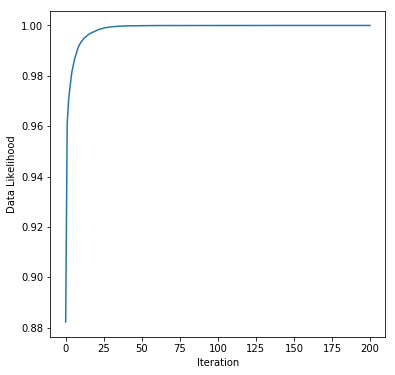

In [44]:
plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

By printing confusion matrix we see the network has done well for most of the characters and confuses some of them with others. for example number 7 has confused with number 9. number 7 is letter `G` and number 9 is letter `I`. That means these two signs are similar to each other and that's why thye network sometime confuses them.

In [45]:
ml.confusionMatrix(tTest, Ytest, range(1,27))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 | 70.0 30.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (10 / 10)
 2 |  0   30.0 70.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (10 / 10)
 3 |  0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (10 / 10)
 4 |  0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (10 / 10)
 5 |  0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

array([[ 0.7,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. , 10. , 10. ],
       [ 0. ,  0.3,  0.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. , 10. , 10. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. , 10. , 10. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. , 10. , 10. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. , 10. , 10. ],
       [ 0. ,  0. ,  0.6,  0. ,  0.

And printing confusion matrix for trained data shows it has classified 100 percent for all letters.

In [46]:
ml.confusionMatrix(tTrain, Ytrain, range(1,27))

       1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26
    ------------------------------------------------------------------------------------------------------------------------------------------------------------
 1 |100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (40 / 40)
 2 |  0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (40 / 40)
 3 |  0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (40 / 40)
 4 |  0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0     (40 / 40)
 5 |  0    0    0    0  100.0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        40., 40.],
       [ 0

We can plot the Actual data vs predicted ones to display our results and better undrstand it

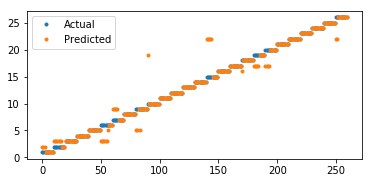

In [47]:

plt.plot(np.hstack((tTrain,Ytrain)), '.')
plt.legend(('Actual','Predicted'))
plt.subplot(2,1,2)
plt.plot(np.hstack((tTest,Ytest)), '.')
plt.legend(('Actual','Predicted'));

## Concolusions

In conclusion, convolutional neural networks can be a very effective approach to recognizing and classifying ASL hand signs. Although a big data approach to this problem may be overkill, we have yet to see ASL datasets on a large scale. It may be
the case a classification task of this nature could be an effective approach to a multiuser system that uses streams of ASL hand signs as input. For example, text entry in a multiuser virtual or augmented reality system. I believe that this approach
demonstrates to main points. Firstly that image classification of ASL hand signs can be done on a large scale given the right cluster resources. Secondly, images of ASL hand signs can be classified effectively and with high level of precision.

Further research on ASL classification should explore confusion between similar ASL hand signs such as letters ‘G’ and ‘I’, or explore letters which require motion such as ‘J’. Additionally, exploration of how ASL can be classified in real time video systems is an important problem since still image data is often inconvenient to produce. Overall, there is a lot of room to expand upon research in the area of ASL recognition. Ie believe that there various applications of ASL recognition that have yet to be determined.

In [2]:
import io
from IPython.nbformat import current
import glob
nbfile = glob.glob('Raoufiirani-Project.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Raoufiirani-Project.ipynb is 2014
